<a href="https://colab.research.google.com/github/Euan-J-Austin/Data_Analytics_and_Intelligence/blob/main/LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OVERVIEW



*   THE STRENGTH FO THE RELATIONSHIP BETWEEN A DEPENDENT VARIABLE (PLOTTED ON THE Y-AXIS) AND INDEPENDENT VARIABLE(S) (PLOTTED ON THE X-AXIS)
*   INTUITION? 'WHAT IS THE IMPACT OF X ON Y?'
*   CORRELATION C.F. REGRESSION? CORRELATION STUDIES DIRECTION; REGRESSION STUDIES IMPACT.





## EQUATION

Y = a + b*X + e

**a is intercept**

**bX is slope**

If continous ... 'If X increases by 1, Y increases by b.'

If binary ... 'If X happens, Y increases by b.'

**e is error term**

# DIAMOND CASE STUDY

In [7]:
#MOUNT

%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression

/content/drive/.shortcut-targets-by-id/19DFaxKzsTyJQzT1s4FwLYh5D9XB9MI1N/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression


In [8]:
#LIBRARIES

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#DATA

df = pd.read_csv('diamond.csv')

## DATA PREPARATION

### ISOLATE X AND Y

In [ ]:
y = df.price
y

In [ ]:
x = df.carat
x

### ADDING CONSTANT

In [26]:
X = sm.add_constant(x)

In [33]:
X.head()

,const,carat
0,1.0,0.30
1,1.0,0.30
2,1.0,0.30
3,1.0,0.30
4,1.0,0.31


### LINEAR REGRESSION MODEL

In [34]:
model1 = sm.OLS(y, X).fit()

In [35]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          3.04e-150
Time:                        22:04:23   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

### VISUALISATION

Text(0, 0.5, 'Price')

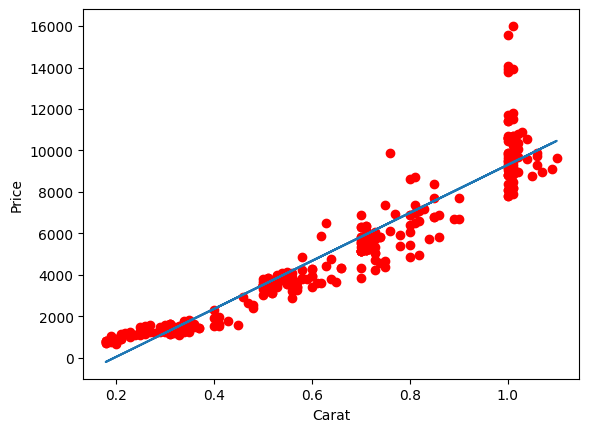

In [48]:
#plots the observations
plt.plot(x, y, 'ro')
#plots the line showing relationship
b, a = np.polyfit(x, y, 1)
plt.plot(x, b * x + a)
#plotting axis
plt.xlabel('Carat')
plt.ylabel('Price')

### DUMMY VARIABLE TRAP

If one observations is True/Yes/1 and others are False/No/0 the a false correlation will follow. If 'Yes' for Coca-Cola, the 'No' for Pepsi is implied. The dummy variable is removed, become the 'baseline' or a part of the intercept.

### LINEAR REGESSION WITH DUMMY VARIABLE

In [49]:
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [51]:
# CREATE BINARY VARIABLE

df['carat_binary'] = np.where(df.carat > df.carat.mean(), 1, 0)

In [ ]:
# LINEAR REGRESSION WITH BINARY VARIABLE

y, x, X = df.price, df.carat_binary, sm.add_constant(x)

In [57]:
model_binary = sm.OLS(y, X).fit()

In [64]:
print(model_binary.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     601.0
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           3.54e-74
Time:                        22:25:30   Log-Likelihood:                -2774.0
No. Observations:                 308   AIC:                             5552.
Df Residuals:                     306   BIC:                             5559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2307.1592    158.014     14.601   

Text(0, 0.5, 'Price')

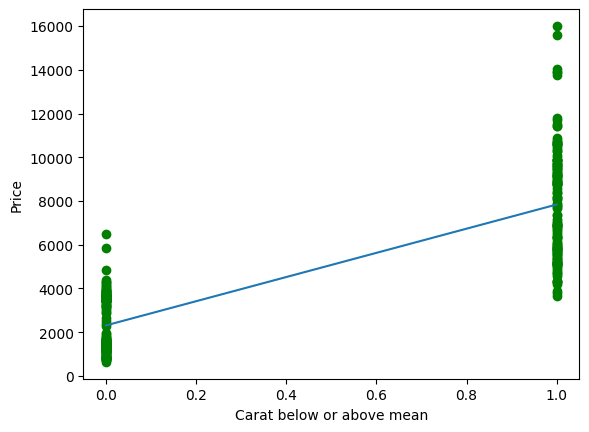

In [63]:
#plots the observations
plt.plot(x, y, 'go')
#plots the line showing relationship
b, a = np.polyfit(x, y, 1)
plt.plot(x, b * x + a)
#plotting axis
plt.xlabel('Carat below or above mean')
plt.ylabel('Price')